<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Step-by-Step-approach" data-toc-modified-id="Step-by-Step-approach-0.1">Step by Step approach</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1">Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#dataset" data-toc-modified-id="dataset-1.1">dataset</a></span></li><li><span><a href="#missing-value-imputation" data-toc-modified-id="missing-value-imputation-1.2">missing value imputation</a></span></li></ul></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-2">Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Example-I" data-toc-modified-id="Example-I-2.1">Example I</a></span><ul class="toc-item"><li><span><a href="#First-ten-observations-of-the-dataset" data-toc-modified-id="First-ten-observations-of-the-dataset-2.1.1">First ten observations of the dataset</a></span></li><li><span><a href="#Grow-the-decision-tree¶" data-toc-modified-id="Grow-the-decision-tree¶-2.1.2">Grow the decision tree¶</a></span><ul class="toc-item"><li><span><a href="#Plot-the-results" data-toc-modified-id="Plot-the-results-2.1.2.1">Plot the results</a></span></li></ul></li></ul></li><li><span><a href="#Example-II" data-toc-modified-id="Example-II-2.2">Example II</a></span></li></ul></li><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-3">Support Vector Machines</a></span><ul class="toc-item"><li><span><a href="#feature-importance" data-toc-modified-id="feature-importance-3.1">feature importance</a></span></li><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-3.2">Split Data</a></span></li><li><span><a href="#Build-Model" data-toc-modified-id="Build-Model-3.3">Build Model</a></span></li><li><span><a href="#Parameter-Tuning" data-toc-modified-id="Parameter-Tuning-3.4">Parameter Tuning</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-3.5">Evaluation</a></span></li></ul></li><li><span><a href="#K-Nearest-Neighbour" data-toc-modified-id="K-Nearest-Neighbour-4">K-Nearest Neighbour</a></span><ul class="toc-item"><li><span><a href="#dataset" data-toc-modified-id="dataset-4.1">dataset</a></span></li><li><span><a href="#check-the-structure-of-data-frame" data-toc-modified-id="check-the-structure-of-data-frame-4.2">check the structure of data frame</a></span></li><li><span><a href="#split-the-datasets-into-training-and-test-dataset" data-toc-modified-id="split-the-datasets-into-training-and-test-dataset-4.3">split the datasets into training and test dataset</a></span></li><li><span><a href="#missing-values" data-toc-modified-id="missing-values-4.4">missing values</a></span></li><li><span><a href="#Training-&amp;-Preprocessing" data-toc-modified-id="Training-&amp;-Preprocessing-4.5">Training &amp; Preprocessing</a></span></li><li><span><a href="#plot-accuracy-vs-K-Value-graph" data-toc-modified-id="plot-accuracy-vs-K-Value-graph-4.6">plot accuracy vs K Value graph</a></span></li><li><span><a href="#predict-classes-for-test-set-using-knn-classifier" data-toc-modified-id="predict-classes-for-test-set-using-knn-classifier-4.7">predict classes for test set using knn classifier</a></span></li><li><span><a href="#Test-set-Statistics-using-confusion-matrix" data-toc-modified-id="Test-set-Statistics-using-confusion-matrix-4.8">Test set Statistics using confusion matrix</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5">Random Forest</a></span><ul class="toc-item"><li><span><a href="#Predict-using-ctree()-function" data-toc-modified-id="Predict-using-ctree()-function-5.1">Predict using <code>ctree()</code> function</a></span></li><li><span><a href="#Predict-using-cForest()-function" data-toc-modified-id="Predict-using-cForest()-function-5.2">Predict using <code>cForest()</code> function</a></span></li></ul></li></ul></div>

# Classification

* Comes under the category of supervised machine learning
* First we should identify the boundary conditions & then the next task is to predict the target class
* To classify gender (target class) using hair length as feature parameter
* the idea is to predict the target class by analysis the training dataset.
* train your model using any abvailable classification algorithms

### Step by Step approach

<font color="red">**Step 1:**</font> load data and run numerical and graphical summaries

<font color="red">**Step 2:**</font> Split the data into training data and test data

<font color="red">**Step 3:**</font> Fit a model using training data

<font color="red">**Step 3:**</font> Use a fitted model to do predictions for the test data

<font color="red">**Step 4:**</font> Create a confusion matrix, and compute the misclassification rate

In [ ]:
**Install and load required packages**

In [116]:
ipak <- function(pkg){
    new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg)) 
        install.packages(new.pkg, repos = "http://cran.us.r-project.org", dependencies = TRUE)
    sapply(pkg, require, character.only = TRUE)
}

# usage
packages <- c("DMwR","caret","party", "partykit","e1071", "caret")
ipak(packages)

DMwR    caret    party partykit    e1071    caret 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE

## Logistic Regression

* response variable is quantitative or categorical
* Example Countries, skin color, eye color,...etc
* It comes under classfication technique and superviese machine learning
* predicting qualitative response 
* probability of each of the categories of a qualitative variable

**Sigmoid Function**  
![Imgur](https://i.imgur.com/fgSBPI5.png)

### dataset

Using kaggle dataset (https://www.kaggle.com/c/titanic/data)

In [117]:
# reading data
titanic <- read.csv("data/titanic.csv")
# viewing data
head(titanic)
# structure of the data whether the variables are categorical, numeric etc.
str(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


In [118]:
#removing insignificant variables or drawing a subset from the data in which we have variables which can contribute to the response variable. 
titanic <- subset(titanic, select = c(2,3,5,6,7,8,10,12))

In [119]:
# checking if the variable are categorical or not
is.factor(titanic$Sex)
is.factor(titanic$Embarked)

[1] TRUE

[1] TRUE

### missing value imputation

* DMwR::knnImputation uses k-Nearest Neighbours approach to impute missing values. 
* The advantage is that you could impute all the missing values in all variables with one call to the function.
* do not include the response variable

In [120]:
# library(DMwR)
titanic <- knnImputation(titanic)
#spliting data into train and test

In [121]:
dim(titanic)

[1] 891   8

In [122]:
train <- titanic[1:800,]
test <- titanic[801:891,]
# fitting the logistic regression when considering all the predictors
basemodel <- glm(Survived~., family = binomial(link = "logit"), data = train)
# summary of the fitted model
summary(basemodel)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7536  -0.5968  -0.4042   0.6255   2.5013  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.664e+01  5.354e+02   0.031  0.97521    
Pclass      -1.266e+00  1.614e-01  -7.845 4.32e-15 ***
Sexmale     -2.688e+00  2.147e-01 -12.523  < 2e-16 ***
Age         -4.917e-02  8.499e-03  -5.786 7.22e-09 ***
SibSp       -3.728e-01  1.170e-01  -3.186  0.00144 ** 
Parch       -1.096e-01  1.321e-01  -0.830  0.40664    
Fare         7.557e-04  2.333e-03   0.324  0.74604    
EmbarkedC   -1.076e+01  5.354e+02  -0.020  0.98396    
EmbarkedQ   -1.076e+01  5.354e+02  -0.020  0.98397    
EmbarkedS   -1.103e+01  5.354e+02  -0.021  0.98356    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1066.33  on 799  degrees of free

In [123]:
#analysis of variance table of the fitted model
anova(basemodel, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,799,1066.3342,NA
Pclass,1,84.7785466,798,981.5557,3.337258e-20
Sex,1,240.0842621,797,741.4714,3.769924e-54
Age,1,27.5631328,796,713.9083,1.520495e-07
SibSp,1,16.8676478,795,697.0407,4.007893e-05
Parch,1,0.7983955,794,696.2423,3.715735e-01
Fare,1,0.3501133,793,695.8921,5.540490e-01
Embarked,3,1.6292692,790,694.2629,6.527716e-01


In [124]:
# fitting of logistic regression when considering only the statistically significant predictors
model <- glm(Survived~.-Parch-Fare-Embarked, family = binomial(link = "logit"),data = train)
# summary of the fitted model
summary(model)


Call:
glm(formula = Survived ~ . - Parch - Fare - Embarked, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8272  -0.6029  -0.3846   0.6072   2.4906  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.801178   0.545447  10.636  < 2e-16 ***
Pclass      -1.308035   0.136657  -9.572  < 2e-16 ***
Sexmale     -2.688206   0.206902 -12.993  < 2e-16 ***
Age         -0.049877   0.008442  -5.908 3.46e-09 ***
SibSp       -0.415307   0.111385  -3.729 0.000193 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1066.33  on 799  degrees of freedom
Residual deviance:  697.04  on 795  degrees of freedom
AIC: 707.04

Number of Fisher Scoring iterations: 5


In [125]:
# analysis of variance table of the fitted model
anova(model, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,799,1066.3342,NA
Pclass,1,84.77855,798,981.5557,3.337258e-20
Sex,1,240.08426,797,741.4714,3.769924e-54
Age,1,27.56313,796,713.9083,1.520495e-07
SibSp,1,16.86765,795,697.0407,4.007893e-05


In [126]:
# prediction of the response on the basis of fitted model
predict <- predict(model,newdata = test,type = "response")
# checking the accuracy
# library(caret)
predict <- ifelse(predict > 0.5,1,0)
error <- mean(predict != test$Survived)
print(paste('Accuracy',1-error))

[1] "Accuracy 0.824175824175824"


## Decision Trees

### Example I

In [127]:
# install.packages("party")
# install.packages("partykit")

In [128]:
# library(party)
# library(partykit)

#### First ten observations of the dataset

In [129]:
print(head(readingSkills))
input.dat <- readingSkills[c(1:105),]

  nativeSpeaker age shoeSize    score
1           yes   5 24.83189 32.29385
2           yes   6 25.95238 36.63105
3            no  11 30.42170 49.60593
4           yes   7 28.66450 40.28456
5           yes  11 31.88207 55.46085
6           yes  10 30.07843 52.83124


#### Grow the decision tree¶

In [130]:
output.tree <- ctree(
 nativeSpeaker ~ age + shoeSize + score,
 data = input.dat)

##### Plot the results

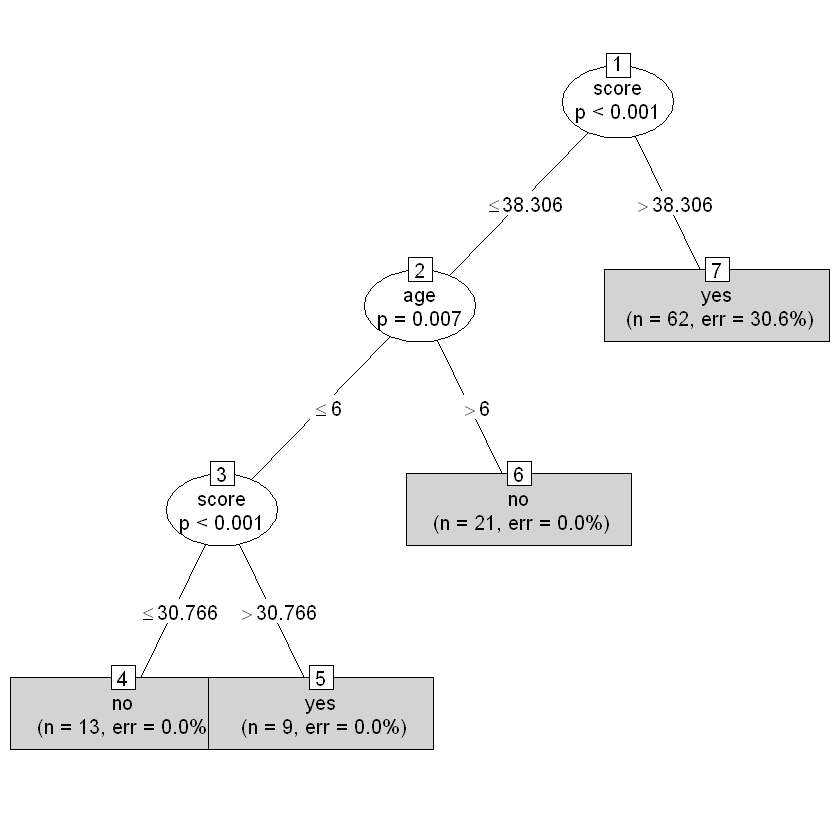

In [131]:
plot(as.simpleparty(output.tree))

### Example II 

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


Model formula:
Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width

Fitted party:
[1] root
|   [2] Petal.Length <= 1.9: setosa (n = 42, err = 0.0%)
|   [3] Petal.Length > 1.9
|   |   [4] Petal.Width <= 1.7: versicolor (n = 42, err = 11.9%)
|   |   [5] Petal.Width > 1.7: virginica (n = 34, err = 2.9%)

Number of inner nodes:    2
Number of terminal nodes: 3


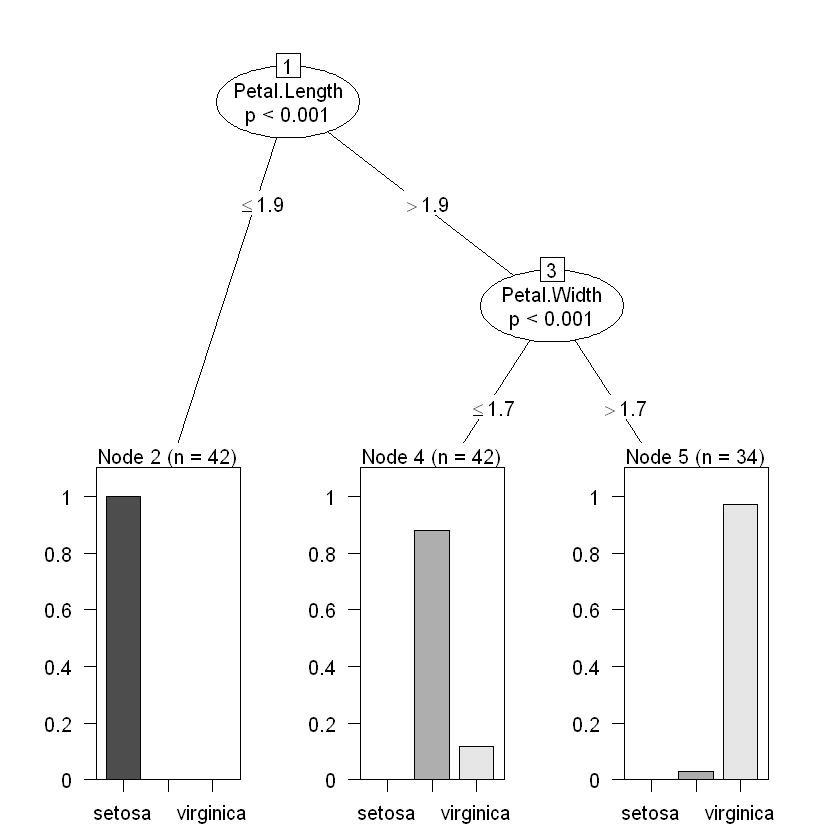

,setosa,versicolor,virginica
1,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
8,1,0,0
9,1,0,0
12,1,0,0
13,1,0,0
14,1,0,0


            Actual
Predicted    setosa versicolor virginica
  setosa         42          0         0
  versicolor      0         37         5
  virginica       0          1        33

[1] 0.05084746

            Actual
Predicted    setosa versicolor virginica
  setosa          8          0         0
  versicolor      0         12         0
  virginica       0          0        12

[1] 0

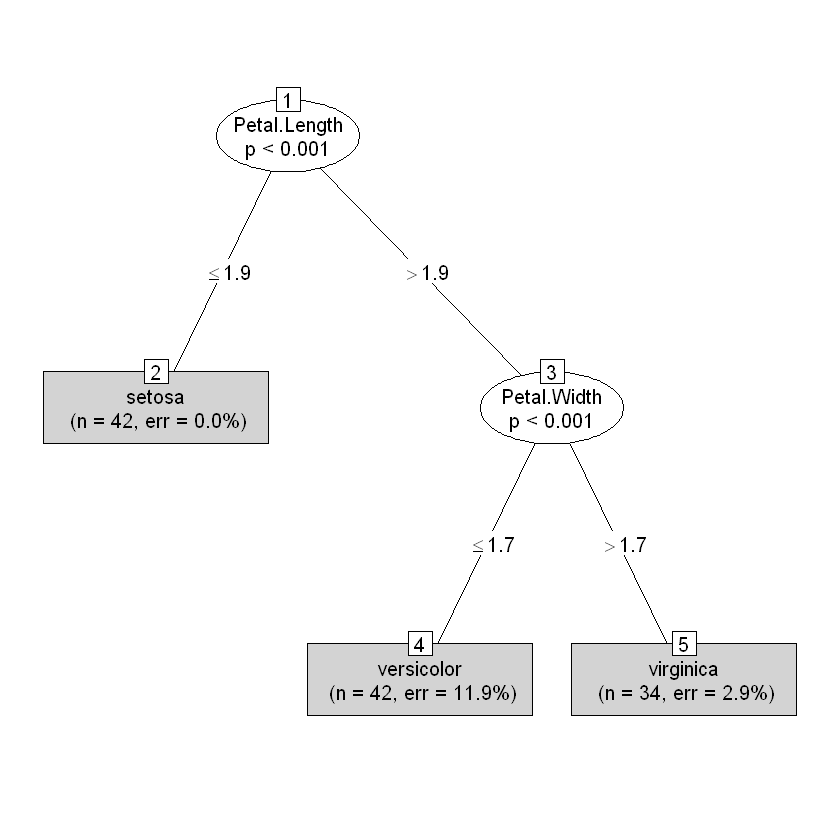

In [132]:
# library(party)
# library(partykit)

# Iris data
data("iris")
str(iris)
summary(iris)

# Data partition
set.seed(555)
ind <- sample(2, 
              nrow(iris),
              replace = TRUE,
              prob = c(0.8, 0.2))
train <- iris[ind==1, ]
test <- iris[ind==2, ]

# Decision tree model
tree <- partykit::ctree(Species~., 
              train,
              control = ctree_control(mincriterion = .9999, minsplit =20 ))

print(tree)

# Visualization of decision trees
plot(tree)
plot(tree, type = 'simple')

# Prediction
predict(tree, train, type = 'prob')

# Misclassification error - train data
p1 <- predict(tree, train)
tab1 <- table(Predicted = p1, Actual = train$Species)
tab1
1 - sum(diag(tab1))/sum(tab1)

# Misclassification error - test data
p2 <- predict(tree, test)
tab2 <- table(Predicted = p2, Actual = test$Species)
tab2
1 - sum(diag(tab2))/sum(tab2)

## Support Vector Machines

* finding the optimal hyperplane in various dimentions
* Goal is to maximizes the margin between two classes
* Support Vectors are observations that supports hyperplane on either sides

![Imgur](https://i.imgur.com/hG4obI0.jpg)

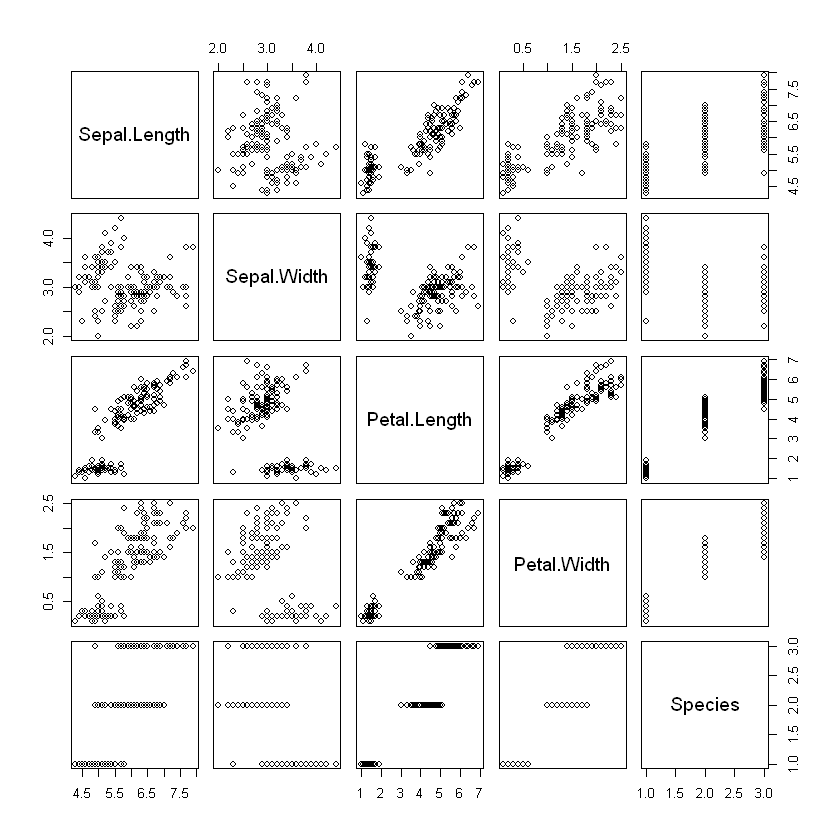

In [133]:
plot(iris)

### feature importance

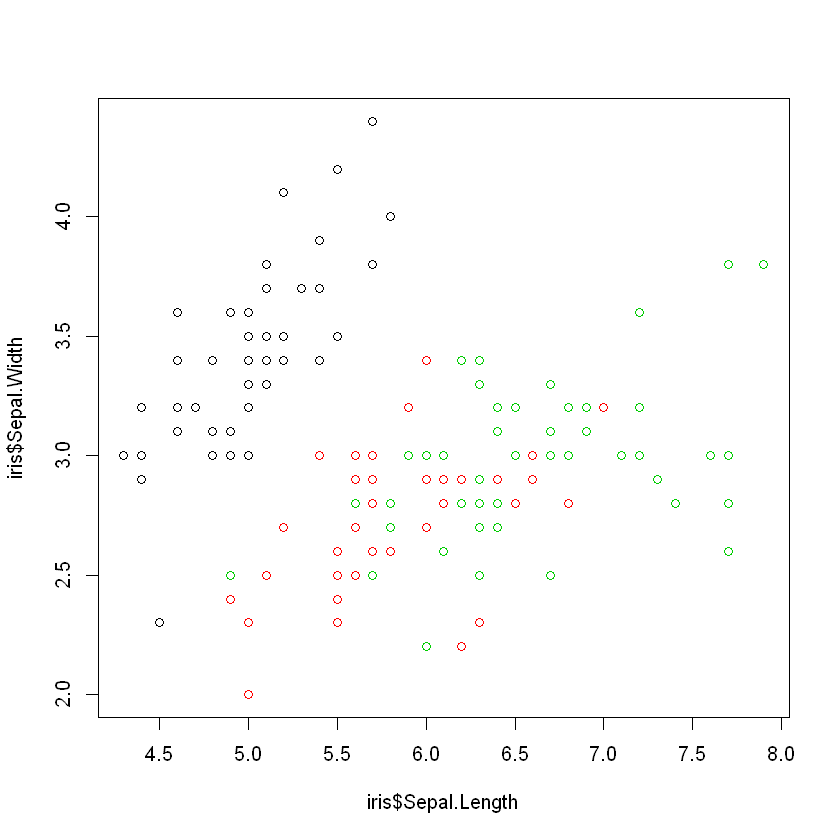

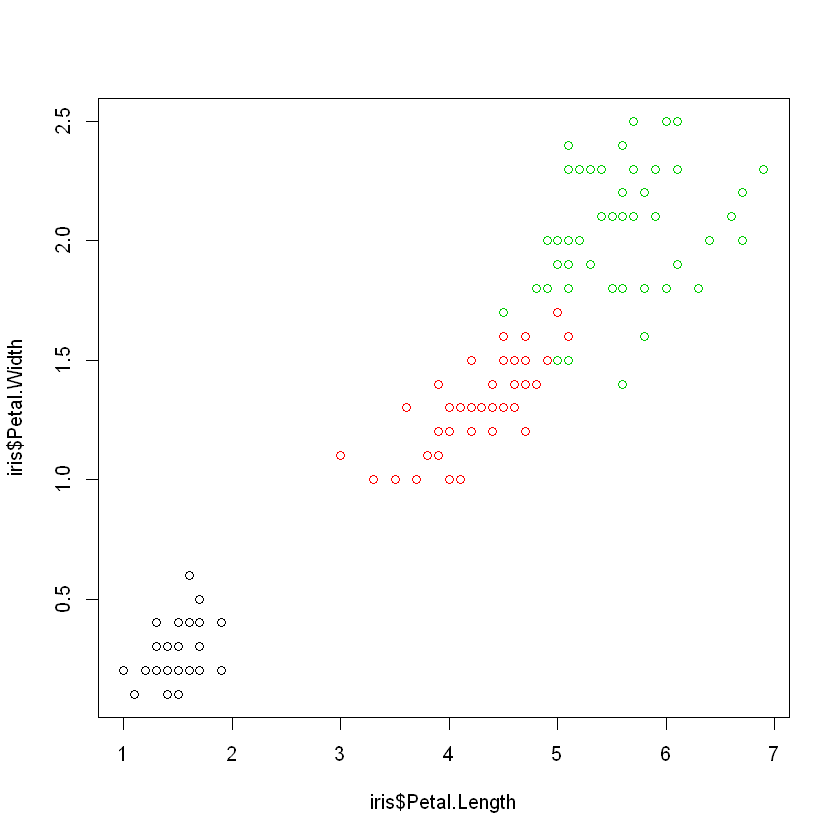

In [134]:
plot(iris$Sepal.Length, iris$Sepal.Width, col=iris$Species)
plot(iris$Petal.Length, iris$Petal.Width, col=iris$Species)

### Split Data

In [135]:
s <- sample(150, 100)
col <- c('Petal.Length','Petal.Width','Species')
iris_train <- iris[s,col]
iris_test <- iris[-s,col]

### Build Model


Call:
svm(formula = Species ~ ., data = iris_train, kernel = "linear", 
    cost = 0.1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  46



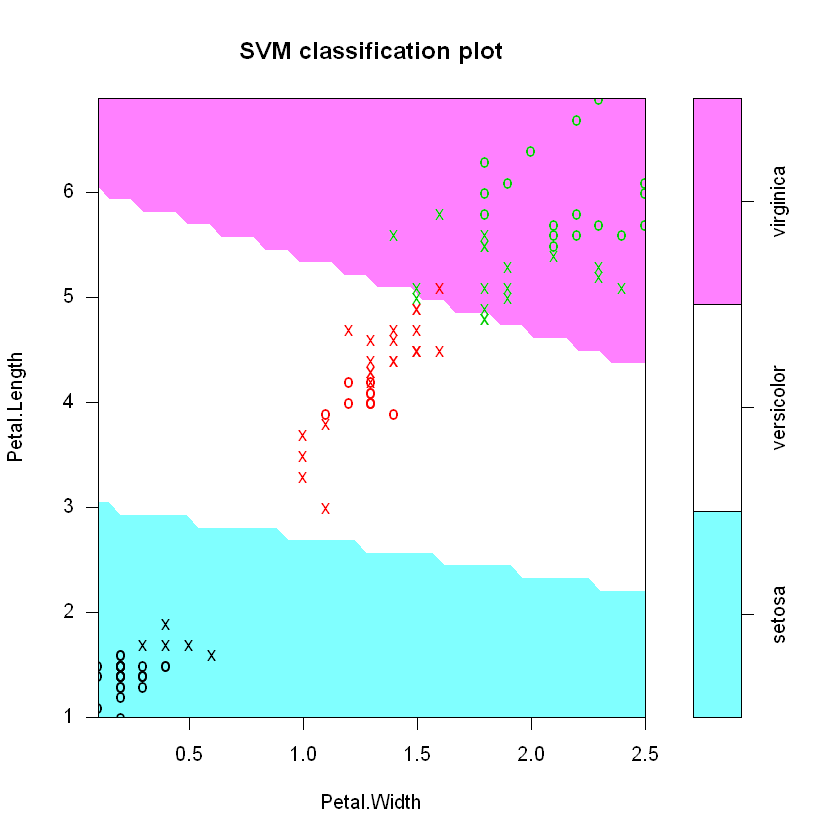

In [136]:
svmfit <- svm(Species ~ ., data = iris_train, kernel="linear", cost=.1, scale = FALSE)
print(svmfit)
plot(svmfit, iris_train[, col])

### Parameter Tuning 

In [137]:
tuned <- tune(svm, Species ~ ., data = iris_train, kernel = "linear", ranges = list(cost = c(0.001, 
    0.01, 0.1, 1.1, 100)))  # best cast parameter cross validation
summary(tuned)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.04 

- Detailed performance results:
     cost error dispersion
1   0.001  0.74 0.06992059
2   0.010  0.42 0.11352924
3   0.100  0.04 0.05163978
4   1.100  0.04 0.05163978
5 100.000  0.04 0.05163978


### Evaluation

            
p            setosa versicolor virginica
  setosa         18          0         0
  versicolor      0         15         1
  virginica       0          2        14

[1] 0.94

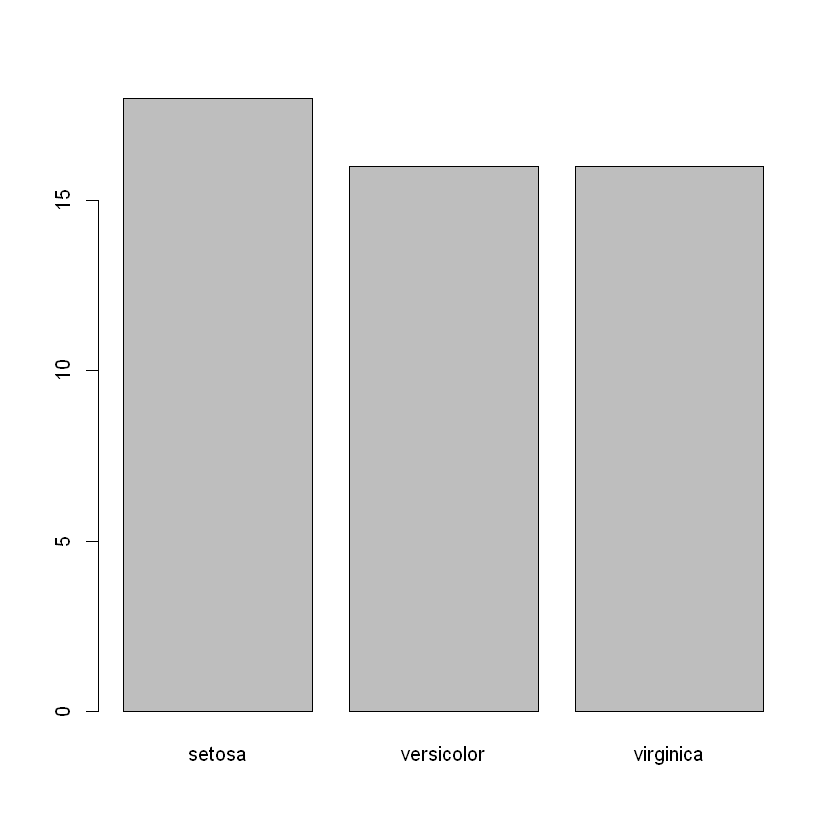

In [138]:
p <- predict(svmfit, iris_test[,col], type='class')
plot(p)
table(p, iris_test[,3])
mean(p==iris_test[,3])

## K-Nearest Neighbour

* k-Nearest Neighbors identifies the k number of observations that are most proximate to the test sample
* its defined by Euclidean distance metric 
* KNN classifier is also a non parametric and instance-based learning algorithm

![Imgur](https://i.imgur.com/zbffHKV.png)

### dataset
http://archive.ics.uci.edu/ml/datasets/Wine  

In [139]:

#library(caret)

# import data from UCI Machine Learning website
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
download.file(url = url, destfile = "wine.data")
df <- read.csv("wine.data", header = FALSE)    

### check the structure of data frame

In [140]:
str(df) 

'data.frame':	178 obs. of  14 variables:
 $ V1 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ V2 : num  14.2 13.2 13.2 14.4 13.2 ...
 $ V3 : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ V4 : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ V5 : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ V6 : int  127 100 101 113 118 112 96 121 97 98 ...
 $ V7 : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ V8 : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ V9 : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ V10: num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ V11: num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ V12: num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ V13: num  3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 ...
 $ V14: int  1065 1050 1185 1480 735 1450 1290 1295 1045 1045 ...


### split the datasets into training and test dataset

In [141]:
set.seed(3033)
intrain <- createDataPartition(y = df$V1, p= 0.7, list = FALSE)
training <- df[intrain,]
testing <- df[-intrain,]

### missing values 

In [142]:
anyNA(df);summary(df) 
training[["V1"]] = factor(training[["V1"]]) # V1 integer variable to factor variable

[1] FALSE

       V1              V2              V3              V4       
 Min.   :1.000   Min.   :11.03   Min.   :0.740   Min.   :1.360  
 1st Qu.:1.000   1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210  
 Median :2.000   Median :13.05   Median :1.865   Median :2.360  
 Mean   :1.938   Mean   :13.00   Mean   :2.336   Mean   :2.367  
 3rd Qu.:3.000   3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558  
 Max.   :3.000   Max.   :14.83   Max.   :5.800   Max.   :3.230  
       V5              V6               V7              V8       
 Min.   :10.60   Min.   : 70.00   Min.   :0.980   Min.   :0.340  
 1st Qu.:17.20   1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205  
 Median :19.50   Median : 98.00   Median :2.355   Median :2.135  
 Mean   :19.49   Mean   : 99.74   Mean   :2.295   Mean   :2.029  
 3rd Qu.:21.50   3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875  
 Max.   :30.00   Max.   :162.00   Max.   :3.880   Max.   :5.080  
       V9              V10             V11              V12        
 Min.   :0.1300

### Training & Preprocessing 

In [143]:
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(3333)
knn_fit <- train(V1 ~., data = training, method = "knn",
 trControl=trctrl,
 preProcess = c("center", "scale"),
 tuneLength = 10)
 
knn_fit 

k-Nearest Neighbors 

125 samples
 13 predictor
  3 classes: '1', '2', '3' 

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 113, 114, 111, 113, 112, 112, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.9627511  0.9436722
   7  0.9435204  0.9148116
   9  0.9490759  0.9230590
  11  0.9495421  0.9237385
  13  0.9465507  0.9194040
  15  0.9521062  0.9276424
  17  0.9548840  0.9318090
  19  0.9493284  0.9233699
  21  0.9574481  0.9356161
  23  0.9490759  0.9231172

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

### plot accuracy vs K Value graph 

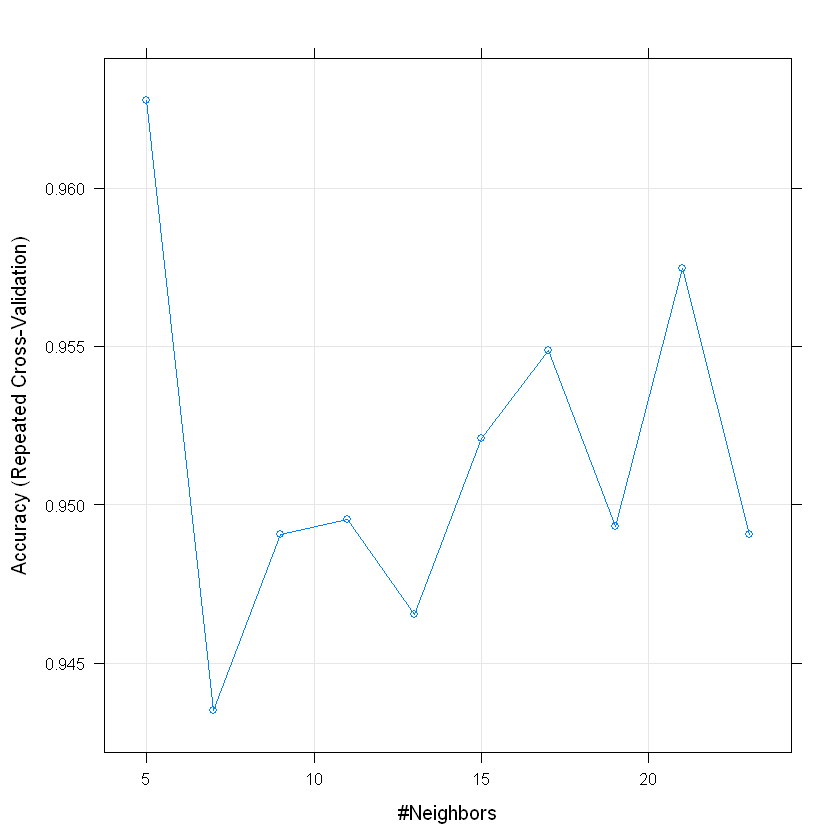

In [144]:
plot(knn_fit)

### predict classes for test set using knn classifier

In [145]:
test_pred <- predict(knn_fit, newdata = testing)
test_pred

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
Levels: 1 2 3

### Test set Statistics using confusion matrix 

In [146]:
confusionMatrix(test_pred, testing$V1 )  

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 15  0  0
         2  0 24  0
         3  0  0 14

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9328, 1)
    No Information Rate : 0.4528     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity             1.000   1.0000   1.0000
Specificity             1.000   1.0000   1.0000
Pos Pred Value          1.000   1.0000   1.0000
Neg Pred Value          1.000   1.0000   1.0000
Prevalence              0.283   0.4528   0.2642
Detection Rate          0.283   0.4528   0.2642
Detection Prevalence    0.283   0.4528   0.2642
Balanced Accuracy       1.000   1.0000   1.0000

<font color='red'>*Further Reference:*</font>    
https://www.datacamp.com/community/tutorials/machine-learning-in-r

## Random Forest

* large number of decision trees from randomized subsets of variables and observations from the input data.
* to achieve better accuracy compare to decision trees
* `cforest()` function can be used from `party` package
* `cForest()` improves the prediction accuracy compared to cTree(), however, it does not have the visualization capabilities that `cTree()`.


In [23]:
#install.packages("ipred", repos='http://cran.us.r-project.org', lib="/home/nbuser/R")

In [24]:
library (ipred)
library (party)
data ("GlaucomaMVF", package = "ipred")

In [25]:
inputData <- GlaucomaMVF 

set.seed (100)

train <- sample(1:nrow(inputData), 0.7*nrow(inputData))  # random sample

trainData <- inputData[train,]  # training data

testData <- inputData[-train,]  # test data

### Predict using `ctree()` function

In [30]:
cTreeMod <- ctree (Class ~ ., data = trainData)  # fit cTree with 'Class' as dependent

actuals <- testData$Class # actuals

predicted <- predict(cTreeMod, newdata = testData) # predicted

table(true = actuals, pred = predicted) # confusion matrix

mean (testData$Class != predicted) # Misclassification Error %

          pred
true       glaucoma normal
  glaucoma       21      4
  normal          8     19

[1] 0.2307692

### Predict using `cForest()` function

In [31]:
cForestMod <- cforest(Class ~ ., data = trainData)  # random Forest model

actuals <- testData$Class # actuals

predicted <- predict(cForestMod, newdata = testData) # predicted

table (true = actuals, pred = predict(cForestMod, newdata = testData))

mean (testData$Class != predicted) # Misclassification Error %

          pred
true       glaucoma normal
  glaucoma       22      3
  normal          2     25

[1] 0.09615385